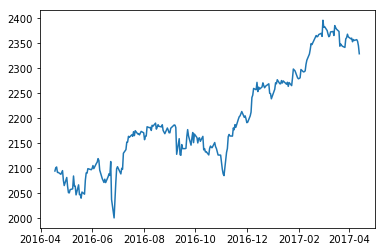

In [1]:
# Outlook on the Close trend
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
dataframe = pd.read_csv('table.csv', usecols=['Date','Close'], index_col=False)
plt.plot(pd.to_datetime(dataframe['Date']), dataframe['Close'])
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
dataframe = pd.read_csv('table.csv', usecols=['Close'], index_col=False)
dataframe = dataframe.iloc[::-1]

dataframe = dataframe.reset_index(drop=True)
# dataframe = dataframe[dataframe.columns[::-1]]
dataframe 

,Close
0,2094.340088
1,2100.800049
2,2102.399902
3,2091.479980
4,2091.580078
5,2087.790039
6,2091.699951
7,2095.149902
8,2075.810059
9,2065.300049


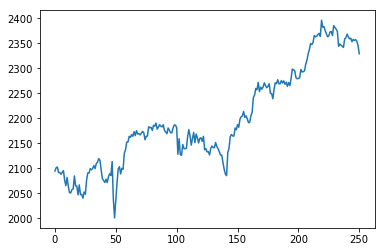

In [3]:
plt.plot(dataframe.index, dataframe['Close'])
plt.show()

In [4]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [5]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [6]:
# Conversuin of our data to floats as it is more suitable for this neural networks
dataset = dataframe.values
dataset = dataset.astype('float32')

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
train_size = int(len(dataset)-63)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(188, 63)


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 0.1084
Epoch 2/100
0s - loss: 0.0168
Epoch 3/100
0s - loss: 0.0105
Epoch 4/100
0s - loss: 0.0084
Epoch 5/100
0s - loss: 0.0064
Epoch 6/100
0s - loss: 0.0049
Epoch 7/100
0s - loss: 0.0038
Epoch 8/100
0s - loss: 0.0030
Epoch 9/100
0s - loss: 0.0025
Epoch 10/100
0s - loss: 0.0023
Epoch 11/100
0s - loss: 0.0022
Epoch 12/100
0s - loss: 0.0021
Epoch 13/100
0s - loss: 0.0021
Epoch 14/100
0s - loss: 0.0021
Epoch 15/100
0s - loss: 0.0020
Epoch 16/100
0s - loss: 0.0021
Epoch 17/100
0s - loss: 0.0020
Epoch 18/100
0s - loss: 0.0020
Epoch 19/100
0s - loss: 0.0020
Epoch 20/100
0s - loss: 0.0020
Epoch 21/100
0s - loss: 0.0019
Epoch 22/100
0s - loss: 0.0020
Epoch 23/100
0s - loss: 0.0019
Epoch 24/100
0s - loss: 0.0019
Epoch 25/100
0s - loss: 0.0018
Epoch 26/100
0s - loss: 0.0019
Epoch 27/100
0s - loss: 0.0018
Epoch 28/100
0s - loss: 0.0018
Epoch 29/100
0s - loss: 0.0018
Epoch 30/100
0s - loss: 0.0017
Epoch 31/100
0s - loss: 0.0017
Epoch 32/100
0s - loss: 0.0017
Epoch 33/100
0s -

In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 14.08 RMSE
Test Score: 9.22 RMSE


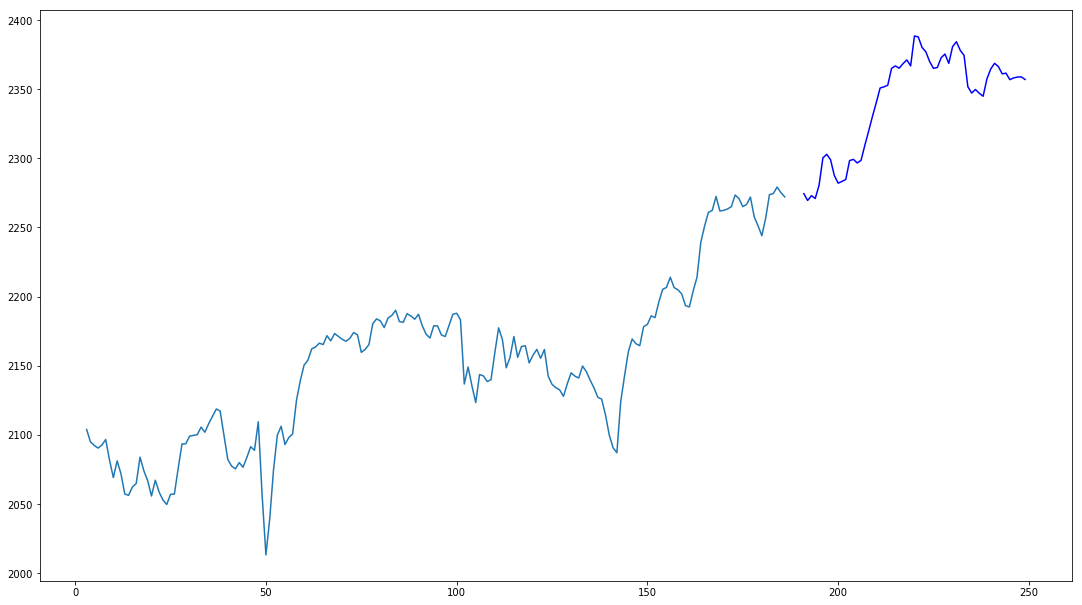

In [14]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
# fig.savefig('test2png.png', |dpi=100)

# plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot, color='blue')
plt.show()

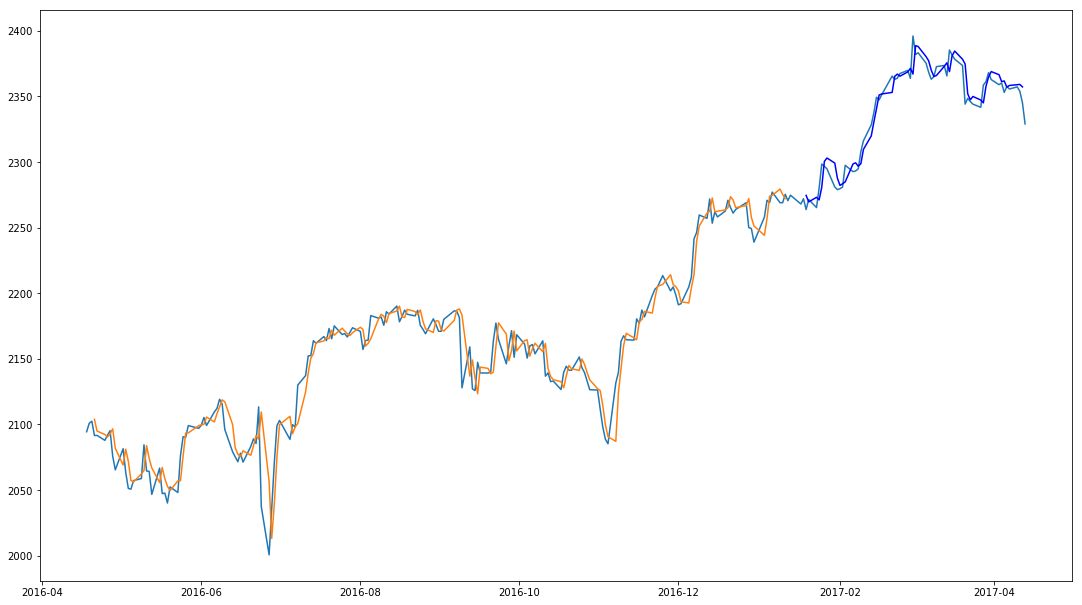

In [15]:
dataframe1 = pd.read_csv('table.csv', usecols=['Date'], index_col=False)
dataframe1 = dataframe1.iloc[::-1]

dataframe1 = dataframe1.reset_index(drop=True)
# dataframe = dataframe[dataframe.columns[::-1]]
dataframe1 
plt.plot(pd.to_datetime(dataframe1['Date']), scaler.inverse_transform(dataset))
plt.plot(pd.to_datetime(dataframe1['Date']),trainPredictPlot)
plt.plot(pd.to_datetime(dataframe1['Date']),testPredictPlot, color='blue')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('1.png', dpi=100)

plt.show()

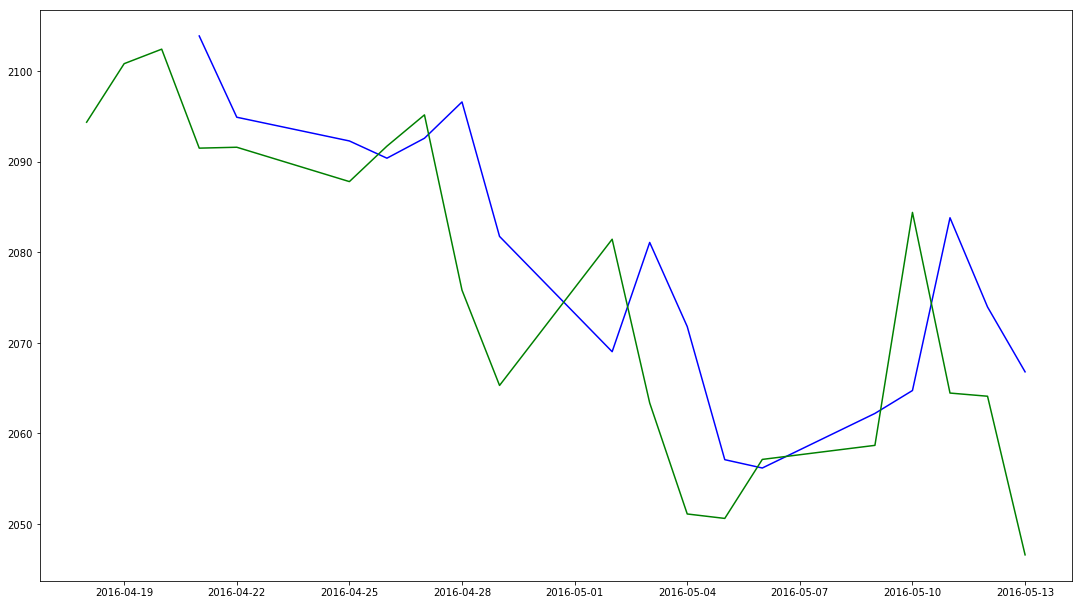

In [16]:
df_o = pd.DataFrame(scaler.inverse_transform(dataset), columns=["Close"])
result_o = pd.concat([dataframe1, df_o], axis=1, join_axes=[dataframe1.index])

df_train = pd.DataFrame(trainPredictPlot, columns=["Close"])
result_train = pd.concat([dataframe1, df_train], axis=1, join_axes=[dataframe1.index])

df_test = pd.DataFrame(testPredictPlot, columns=["Close"])
result_test = pd.concat([dataframe1, df_test], axis=1, join_axes=[dataframe1.index])


plt.plot(pd.to_datetime(result_train['Date'].head(20)), result_train['Close'].head(20), color='blue')
plt.plot(pd.to_datetime(result_o.head(20)['Date']), result_o.head(20)['Close'], color='green')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [17]:
result_train

,Date,Close
0,2016-04-18,NaN
1,2016-04-19,NaN
2,2016-04-20,NaN
3,2016-04-21,2103.856201
4,2016-04-22,2094.890625
5,2016-04-25,2092.272705
6,2016-04-26,2090.371582
7,2016-04-27,2092.571777
8,2016-04-28,2096.576660
9,2016-04-29,2081.742188


In [27]:
result_test.tail(24)

,Date,Close
227,2017-03-13,2372.827637
228,2017-03-14,2375.500244
229,2017-03-15,2368.786377
230,2017-03-16,2380.895752
231,2017-03-17,2384.443604
232,2017-03-20,2378.249268
233,2017-03-21,2374.600342
234,2017-03-22,2351.860352
235,2017-03-23,2347.305420
236,2017-03-24,2349.856689


In [39]:
dates = []
predictions = []
actuals = []
df_dates = pd.DataFrame(result_test['Date'].tail(23))
df_close = pd.DataFrame(result_test['Close'].tail(25).head(24))
df_close_a = pd.DataFrame(scaler.inverse_transform(dataset), columns=['Close']).tail(24)
df_dates

,Date
228,2017-03-14
229,2017-03-15
230,2017-03-16
231,2017-03-17
232,2017-03-20
233,2017-03-21
234,2017-03-22
235,2017-03-23
236,2017-03-24
237,2017-03-27


In [40]:
for date in df_dates['Date']:
    dates.append(pd.to_datetime(date))



i=226
while i < 249:
    if df_close['Close'][i] > df_close['Close'][i+1]:
        predictions.append(1)
    else:
        predictions.append(0)
    i=i+1
    
i=227
while i < 250:
    if df_close_a['Close'][i] > df_close_a['Close'][i+1]:
        actuals.append(1)
    else:
        actuals.append(0)
    i=i+1


In [41]:
df_new = pd.DataFrame({'Date' : dates, 'Prediction': predictions, 'Actual':actuals})
df_new

,Actual,Date,Prediction
0,1,2017-03-14,0
1,0,2017-03-15,0
2,1,2017-03-16,1
3,1,2017-03-17,0
4,1,2017-03-20,0
5,1,2017-03-21,1
6,0,2017-03-22,1
7,1,2017-03-23,1
8,1,2017-03-24,1
9,1,2017-03-27,0


In [42]:
df_new.to_csv("Stock_Prediction_Actual1.csv", index=False)
